<a href="https://colab.research.google.com/github/brillync/AI/blob/main/clustering_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [344]:
import pandas as pd

# Load the data
data = pd.read_csv('cleaned.csv')

# Display the first few rows
data

,number,code,price,num_digits
0,1313,U,109000,4
1,3222,H,72000,4
2,30033,P,24000,5
3,7765,L,17500,4
4,8876,U,17500,4
...,...,...,...,...
3835,7210,Q,9200,4
3836,6353,E,15000,4
3837,91181,R,6500,5
3838,8704,Q,6600,4


In [345]:
data.head()

,number,code,price,num_digits
0,1313,U,109000,4
1,3222,H,72000,4
2,30033,P,24000,5
3,7765,L,17500,4
4,8876,U,17500,4


In [347]:
data.describe()

,number,price,num_digits
count,3840.000000,3.840000e+03,3840.000000
mean,53741.961198,1.289900e+04,4.902344
std,27379.850664,8.745635e+04,0.331697
min,62.000000,1.000000e+00,2.000000
25%,33920.500000,2.400000e+03,5.000000
50%,55267.000000,2.600000e+03,5.000000
75%,77192.500000,3.000000e+03,5.000000
max,99991.000000,2.990000e+06,5.000000


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      3840 non-null   int64 
 1   code        3840 non-null   object
 2   price       3840 non-null   int64 
 3   num_digits  3840 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 120.1+ KB


In [349]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
number        0
code          0
price         0
num_digits    0
dtype: int64


In [350]:
categorical_variable =data[['number', 'price', 'num_digits']]
numerical_variable = data[['code']]

<Axes: >

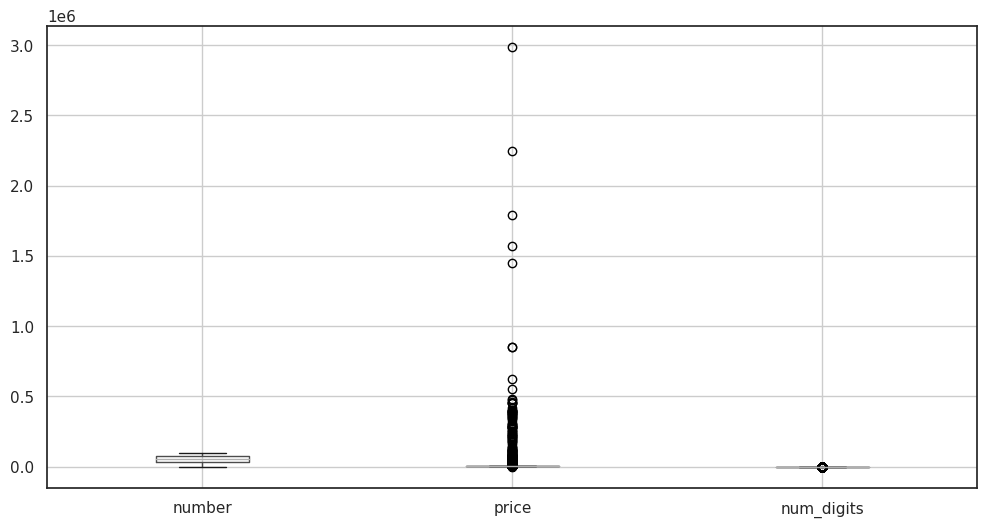

In [351]:
data.boxplot(figsize = (12,6))

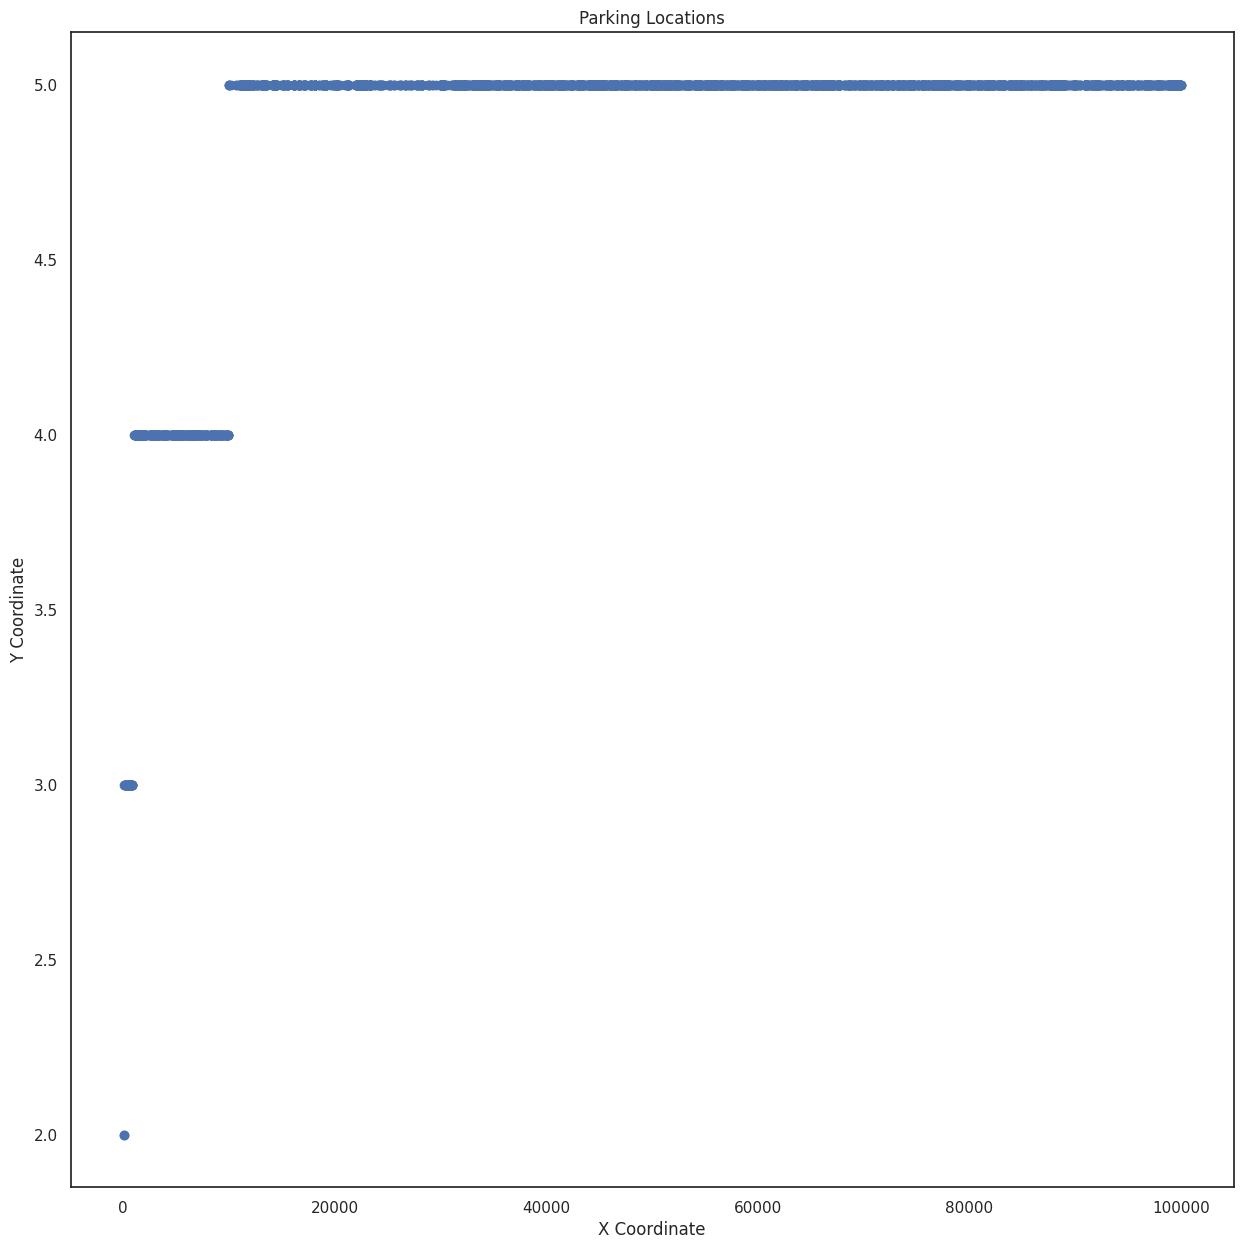

In [357]:

# Visualisasi data
plt.scatter(data['number'], data['num_digits'])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Parking Locations')
plt.show()

In [359]:
#selecting the numeric columns
numeric_columns = data.select_dtypes(include = ['int64', 'float64'])

def outlier_detection(column):
    # calculating the quantiles for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # calculating lower bound and upper bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(data)) * 100
        return column, percentage

In [360]:
columns_with_outliers = [outlier_detection(column) for column in numeric_columns.columns]
columns_with_outliers = [(column,percentage) for column, percentage in columns_with_outliers if column is not None]


In [361]:

for column, percentage in columns_with_outliers:
    print(f"Column Name : {column}, Percentage of outliers : {percentage:.2f}%")

Column Name : price, Percentage of outliers : 21.41%
Column Name : num_digits, Percentage of outliers : 8.72%


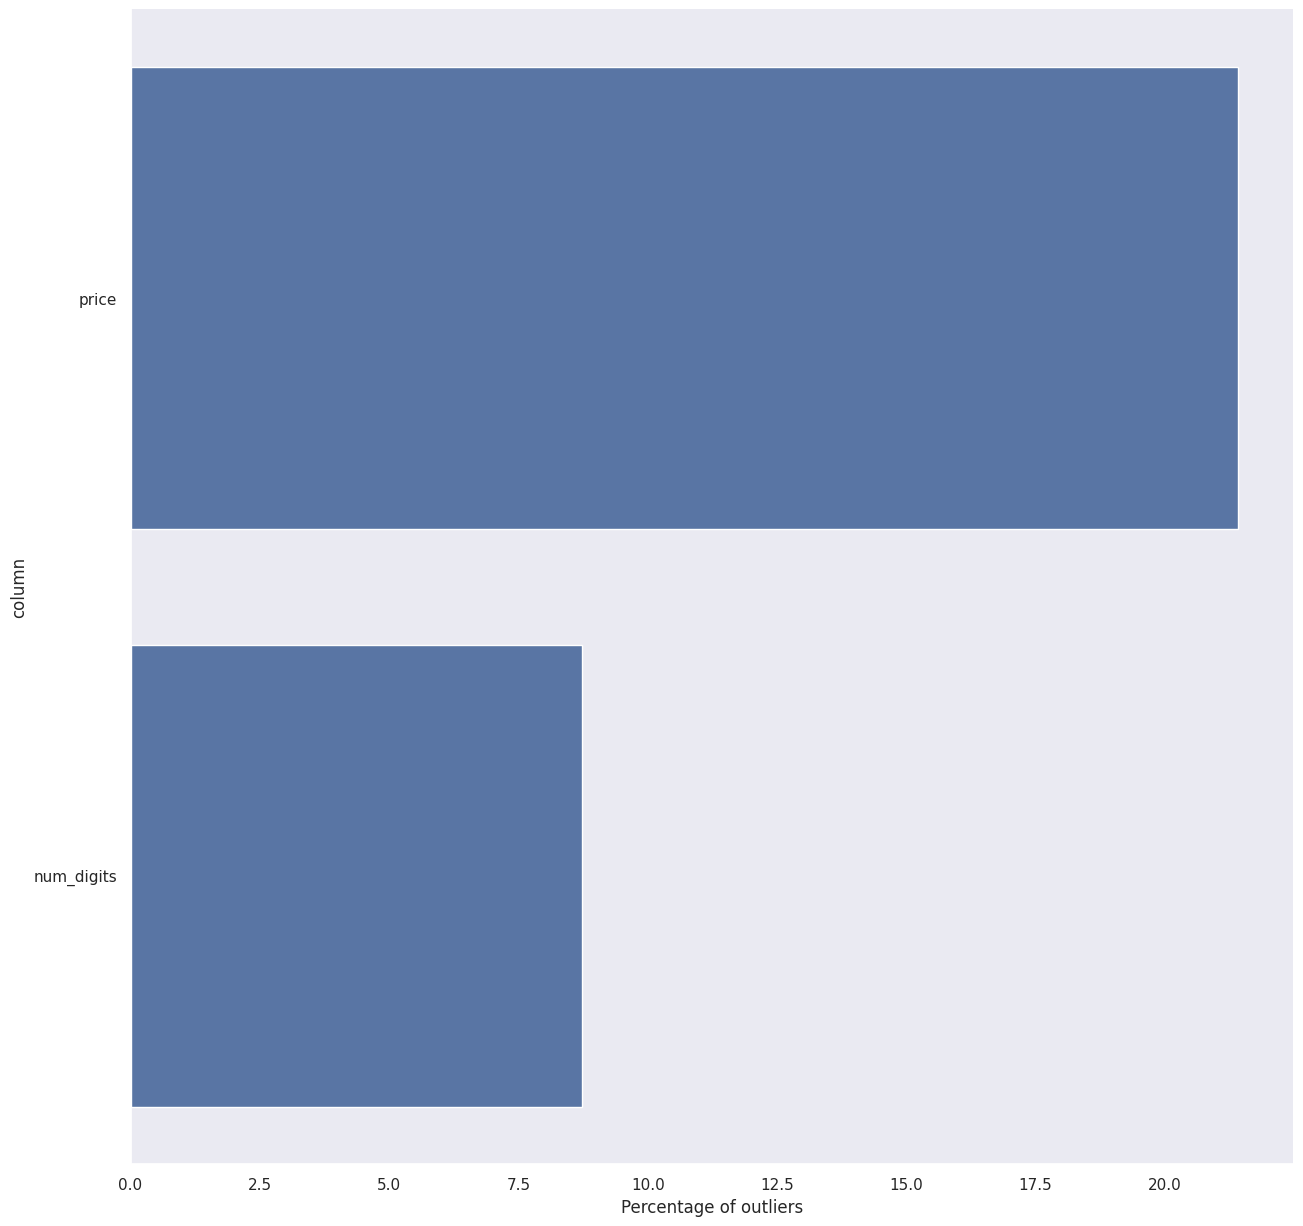

In [362]:

temp = pd.DataFrame(columns_with_outliers, columns = ['column', 'percentage'])

sns.set_style('dark')
sns.barplot(data = temp, y = 'column', x = 'percentage')
plt.xlabel("Percentage of outliers")
sns.despine()
plt.show()

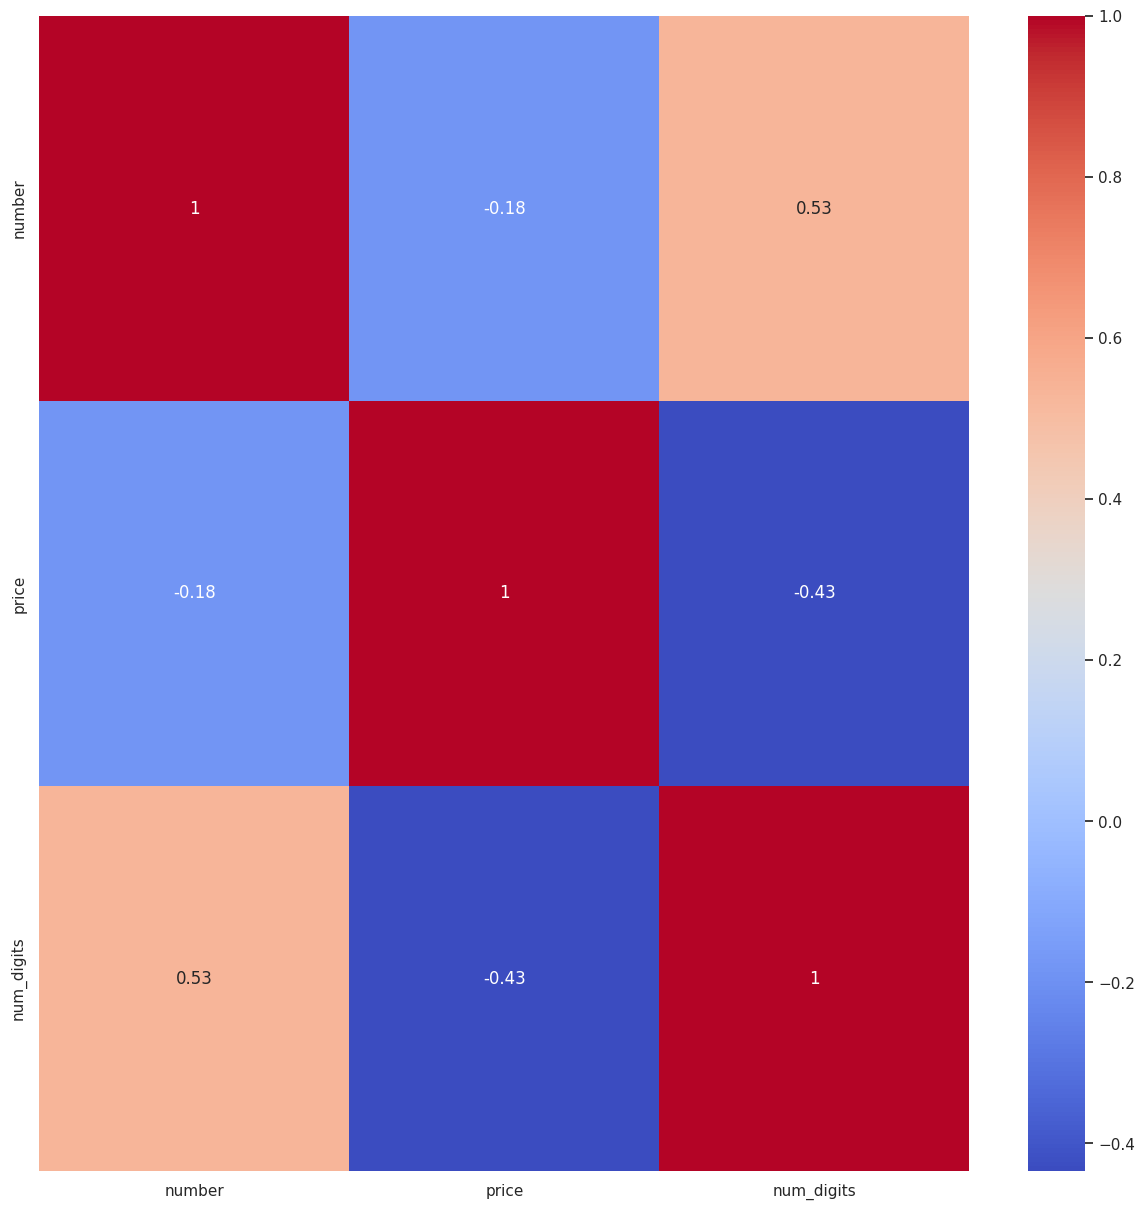

In [363]:

# multicollinearity check

corr_matrix = numeric_columns.corr()


sns.set_style('white')
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [367]:
data_full = data.dropna()
data_full1 = data_full.reset_index(drop = True)
data_full1.head(10)

,number,code,price,num_digits
0,1313,U,109000,4
1,3222,H,72000,4
2,30033,P,24000,5
3,7765,L,17500,4
4,8876,U,17500,4
5,1146,O,16500,4
6,2744,E,12900,4
7,22828,L,12900,5
8,5546,R,12900,4
9,2633,Q,12500,4


In [368]:
data_feature = data_full1[['number', 'code', 'price', 'num_digits']]

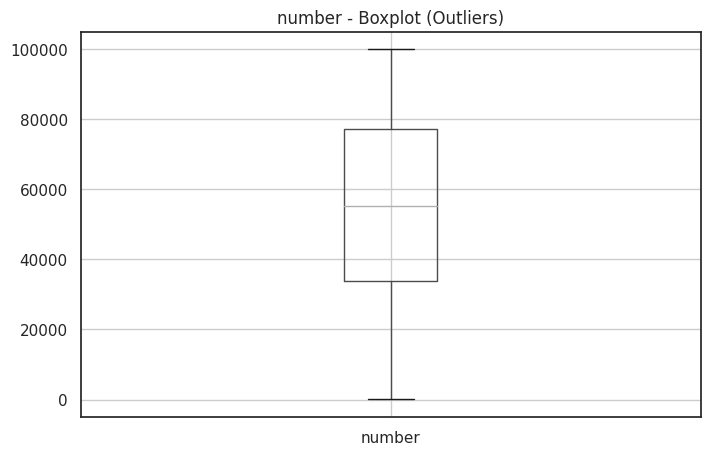

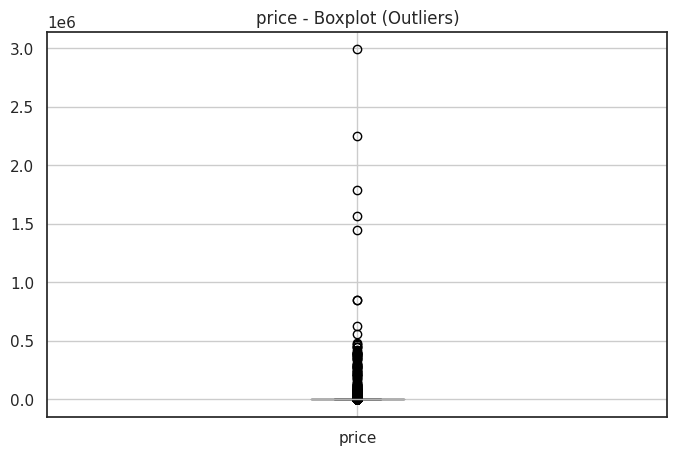

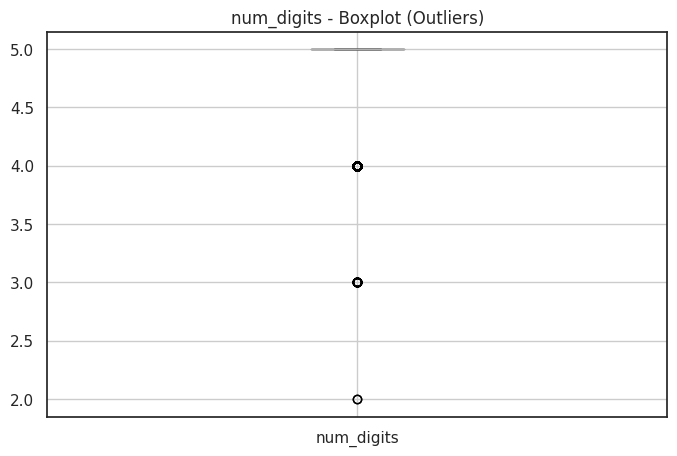

In [371]:

import matplotlib.pyplot as plt

# Create boxplots for numerical columns to visualize outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=col)
    plt.title(col + ' - Boxplot (Outliers)')
    plt.show()


In [372]:
def identify_outliers(data, columns, threshold=1.5):
    """
    Identify outliers in the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with rows flagged as outliers along with the column name and reason.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - outliers_df: DataFrame with flagged outliers and reasons
    """
    outliers_info = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Add information for each outlier row
        for index, row in outliers.iterrows():
            outlier_info = {
                'Value': row[col],
                'Column': col,
                'Reason': 'Below Lower Bound' if row[col] < lower_bound else 'Above Upper Bound'
            }
            outliers_info.append(outlier_info)

    # Create a new dataframe with outlier information
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

In [373]:

def identify_outliers(data, columns, threshold=1.5):
    """
    Identify outliers in the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with rows flagged as outliers along with the column name and reason.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - outliers_df: DataFrame with flagged outliers and reasons
    """
    outliers_info = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Add information for each outlier row
        for index, row in outliers.iterrows():
            outlier_info = {
                'Value': row[col],
                'Column': col,
                'Reason': 'Below Lower Bound' if row[col] < lower_bound else 'Above Upper Bound'
            }
            outliers_info.append(outlier_info)

    # Create a new dataframe with outlier information
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Identify outliers in numerical columns using IQR and create dataframe with flag and reasons
outliers_df = identify_outliers(data, numerical_columns, threshold=1.5)

# Display the outliers dataframe
print("Outliers DataFrame:")
print(outliers_df.head())

# Save the outliers dataframe to a new CSV file (optional)
#outliers_df.to_csv('outliers_flagged.csv', index=False)

Outliers DataFrame:
    Value Column             Reason
0  109000  price  Above Upper Bound
1   72000  price  Above Upper Bound
2   24000  price  Above Upper Bound
3   17500  price  Above Upper Bound
4   17500  price  Above Upper Bound


In [374]:
def remove_outliers_iqr_with_report(data, columns, threshold=1.5):
    """
    Remove outliers from the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with removed outliers and returns it along with a report of removed rows.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - cleaned_data: DataFrame with outliers removed
        - removed_data: DataFrame containing removed rows
    """
    removed_rows = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Append the outliers to the removed_rows list
        removed_rows.extend(outliers.index.tolist())

    # Remove duplicate indices in the removed_rows list
    removed_rows = list(set(removed_rows))

    # Create a new dataframe with removed rows
    removed_data = data.loc[removed_rows]

    # Remove outliers from the original dataframe
    cleaned_data = data.drop(removed_rows)

    return cleaned_data, removed_data

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers from numerical columns using IQR and get removed rows
cleaned_data, removed_data = remove_outliers_iqr_with_report(data, numerical_columns, threshold=1.5)

# Display shape of original and cleaned data
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", cleaned_data.shape)

# Display the removed rows
print("\nRows Removed as Outliers:")
print(removed_data)


Original Data Shape: (3840, 4)
Cleaned Data Shape: (3018, 4)

Rows Removed as Outliers:
      number code   price  num_digits
0       1313    U  109000           4
1       3222    H   72000           4
2      30033    P   24000           5
3       7765    L   17500           4
4       8876    U   17500           4
...      ...  ...     ...         ...
3834    9638    H    7000           4
3835    7210    Q    9200           4
3836    6353    E   15000           4
3837   91181    R    6500           5
3838    8704    Q    6600           4

[822 rows x 4 columns]


In [376]:
from sklearn.preprocessing import LabelEncoder

# Encode 'product quality' column
label_encoder = LabelEncoder()
data['code'] = label_encoder.fit_transform(data['code'])
data

,number,code,price,num_digits
0,1313,20,109000,4
1,3222,7,72000,4
2,30033,15,24000,5
3,7765,11,17500,4
4,8876,20,17500,4
...,...,...,...,...
3835,7210,16,9200,4
3836,6353,4,15000,4
3837,91181,17,6500,5
3838,8704,16,6600,4


In [377]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns):
    """
    Normalize the specified numerical columns in the DataFrame using Min-Max scaling.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to normalize

    Returns:
        - normalized_data: DataFrame with normalized columns
    """
    scaler = MinMaxScaler()
    data_normalized = data.copy()
    data_normalized[columns] = scaler.fit_transform(data_normalized[columns])

    return data_normalized

# List of numerical columns to normalize
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns using Min-Max scaling
normalized_data = normalize_data(data, numerical_columns)

# Display the first few rows of normalized data
print("Normalized Data:")
print(normalized_data.head())

# Save the normalized data to a new CSV file (optional)
#normalized_data.to_csv('normalized_machine_failure_data.csv', index=False)
normalized_data

Normalized Data:
     number      code     price  num_digits
0  0.012519  0.833333  0.036455    0.666667
1  0.031622  0.291667  0.024080    0.666667
2  0.299923  0.625000  0.008026    1.000000
3  0.077085  0.458333  0.005853    0.666667
4  0.088203  0.833333  0.005853    0.666667


,number,code,price,num_digits
0,0.012519,0.833333,0.036455,0.666667
1,0.031622,0.291667,0.024080,0.666667
2,0.299923,0.625000,0.008026,1.000000
3,0.077085,0.458333,0.005853,0.666667
4,0.088203,0.833333,0.005853,0.666667
...,...,...,...,...
3835,0.071531,0.666667,0.003077,0.666667
3836,0.062955,0.166667,0.005016,0.666667
3837,0.911837,0.708333,0.002174,1.000000
3838,0.086481,0.666667,0.002207,0.666667


In [378]:
data = pd.get_dummies(data, columns=['code'])

In [380]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(normalized_data,normalized_data)
print(dist_matrix)

[[0.         0.54214468 0.48777365 ... 0.96782493 0.1855293  1.28832058]
 [0.54214468 0.         0.54264638 ... 1.02955353 0.37962209 1.00734719]
 [0.48777365 0.54264638 0.         ... 0.61759048 0.39804319 0.89183168]
 ...
 [0.96782493 1.02955353 0.61759048 ... 0.         0.89110031 0.7087489 ]
 [0.1855293  0.37962209 0.39804319 ... 0.89110031 0.         1.13020605]
 [1.28832058 1.00734719 0.89183168 ... 0.7087489  1.13020605 0.        ]]


In [381]:
# Using hierarchical clustering algorithm
from scipy.cluster import hierarchy

Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

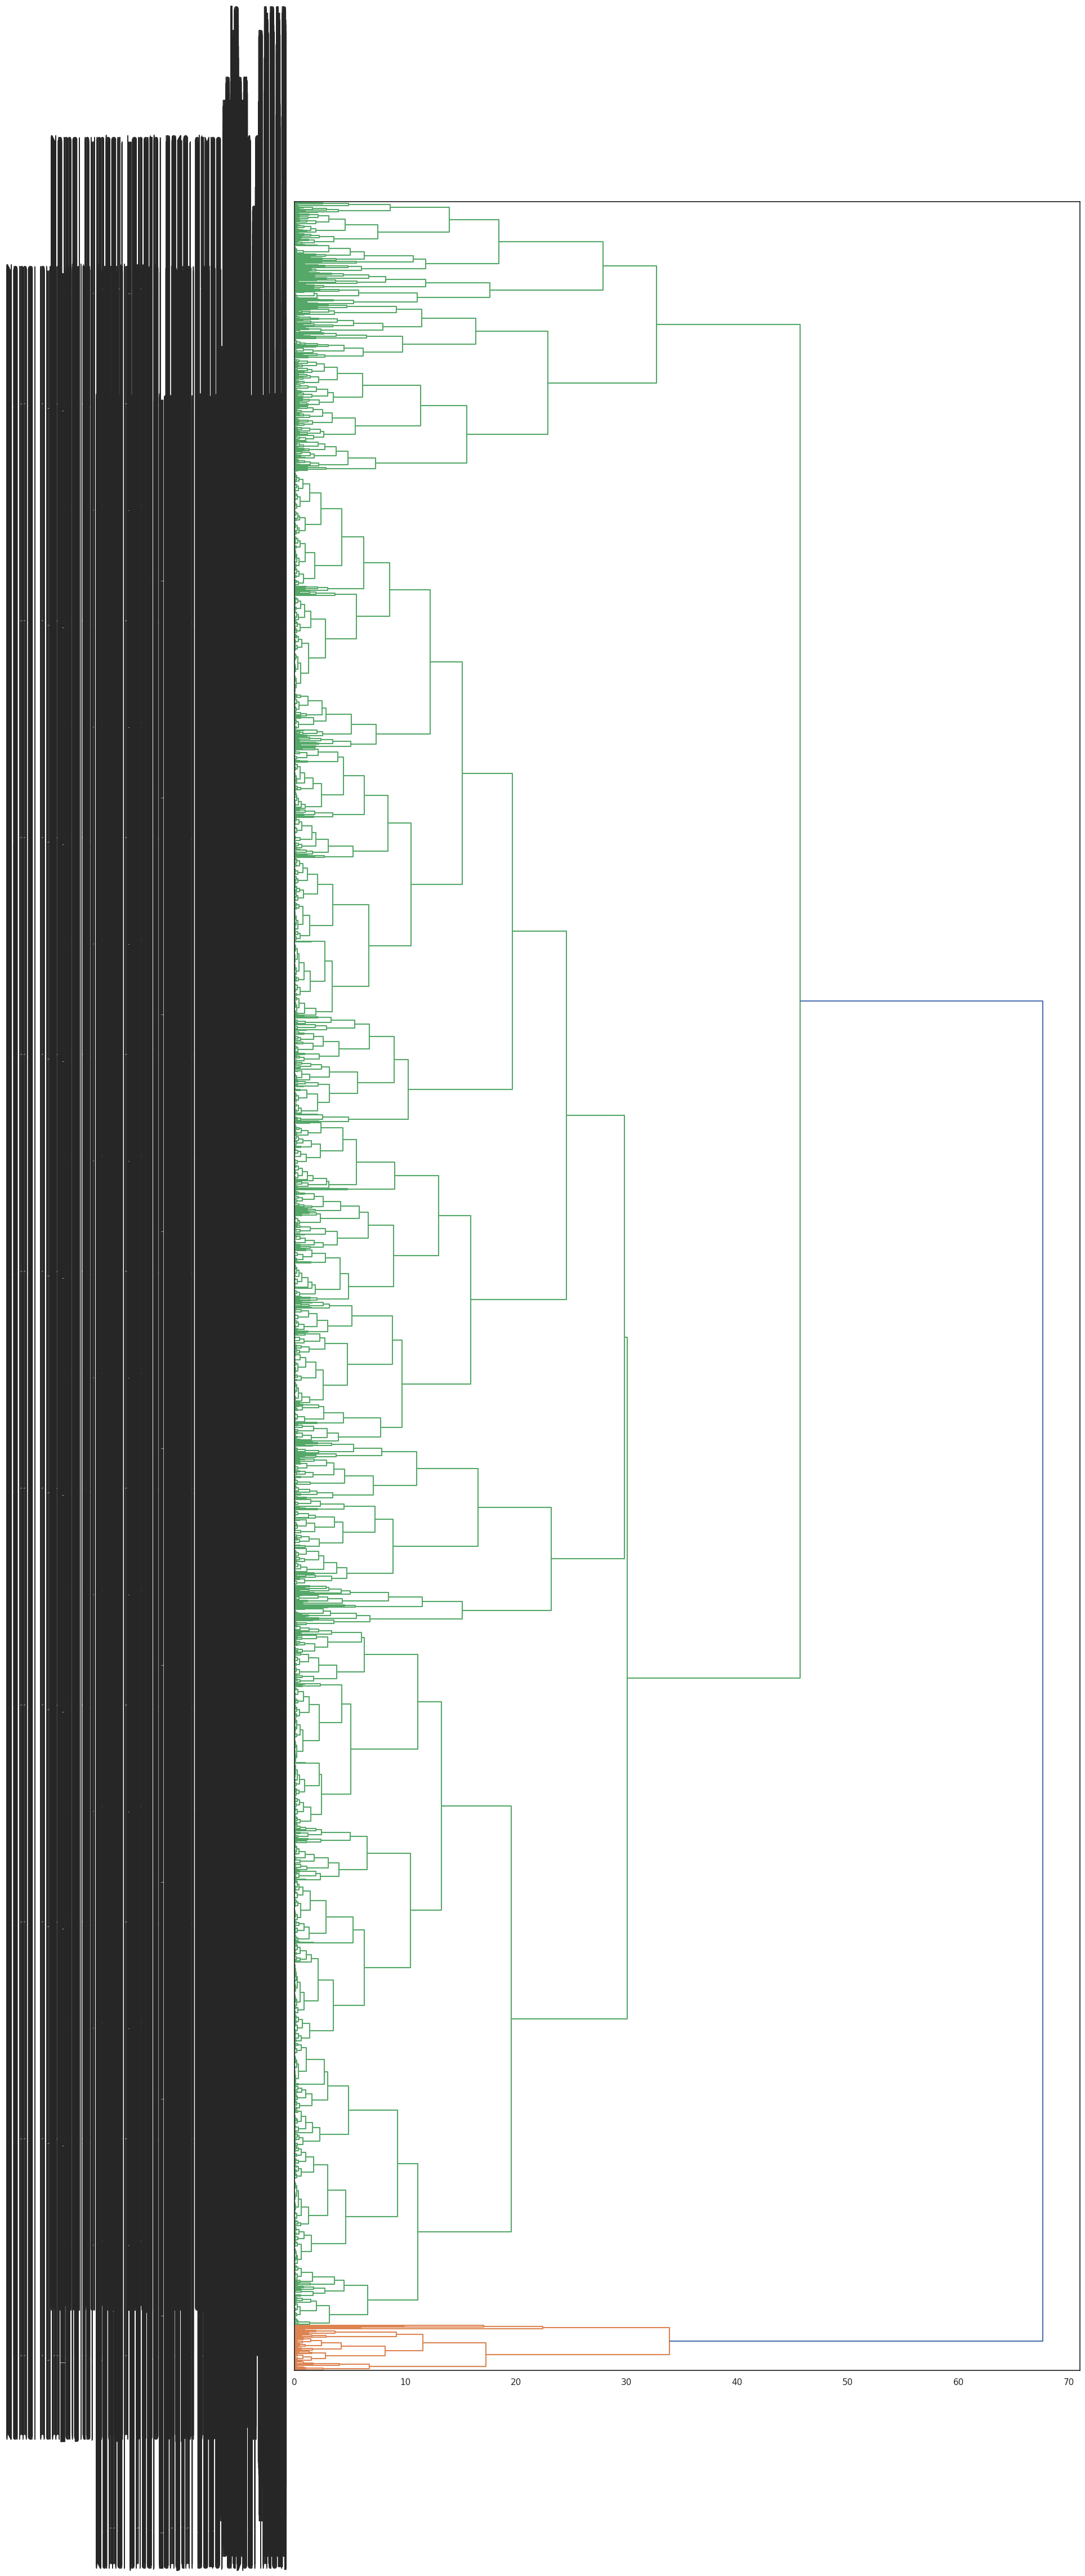

In [388]:
import pylab

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data_full1['number'], \
                           data_full1['num_digits'], \
                           (data_full1['price']))

dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_label_func = llf, \
                              leaf_rotation = 0, leaf_font_size = 12, \
                              orientation = 'right')


In [389]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [390]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([1, 2, 0, ..., 0, 1, 2])

In [391]:
data_full1['cluster_'] = agglom.labels_
data_full1.head(10)

,number,code,price,num_digits,cluster_
0,1313,U,109000,4,1
1,3222,H,72000,4,2
2,30033,P,24000,5,0
3,7765,L,17500,4,1
4,8876,U,17500,4,1
5,1146,O,16500,4,1
6,2744,E,12900,4,3
7,22828,L,12900,5,1
8,5546,R,12900,4,1
9,2633,Q,12500,4,1


<ipython-input-393-0e0fc8591ee3>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.number, subset.code, s = subset.price*10, c=color, \
<ipython-input-393-0e0fc8591ee3>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.number, subset.code, s = subset.price*10, c=color, \
<ipython-input-393-0e0fc8591ee3>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which

Text(0, 0.5, 'num_digits')

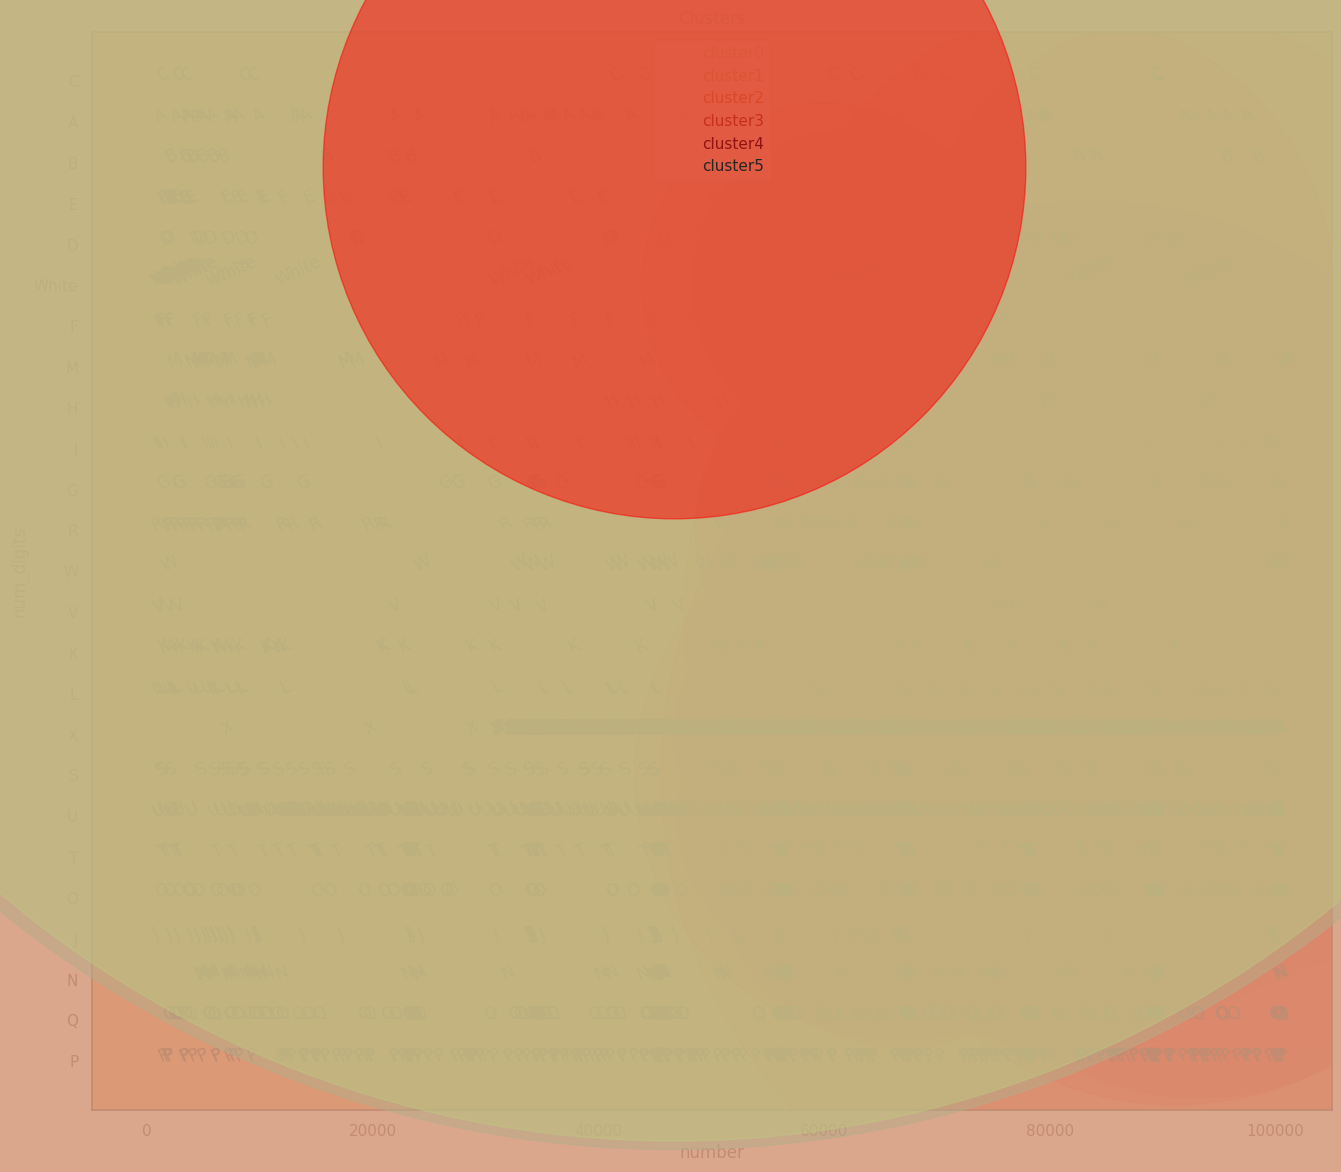

In [393]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = data_full1[data_full1.cluster_ == label]
    for i in subset.index:
            plt.text(subset.number[i], subset.code[i], str(subset['code'][i]), \
                     rotation=25)
    plt.scatter(subset.number, subset.code, s = subset.price*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('number')
plt.ylabel('num_digits')